# Capitulo 3
## Clasificación 
### MNIST data set

MNIST es un data set que contiene **70,000 imagenes** de digitos  
hechos por personas que respondieron encuestas de censo en EEUU,  
cada imagen tiene el mismo tamaño y el respectivo numero de una  
forma centrada. Este data set se ha estudiado en multiples momentos  
con nuevos algoritmos de clasificación, con el tiempo esté data set  
ha llamado el "hello world" del machine learning


In [1]:
# Como mnsit es un data set famoso scikit-learn tiene ayudas 
# para obtenerlo de una forma sencilla 
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Generalmente los data sets de sklearn tienen una estructura  
similar DESCR  describe el dataset, data contiene los datos en forma  
de array target es otro array pero con los targets del dataset

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

Cada imagen tiene 784 columnas, la razón es que cada imagen  
es de **28x28 pixeles** lo que equibale a 784 columnas  
que representan un pixel con valores entre 0 y 255  
para representar la intencidad del pixel en la escala de grises

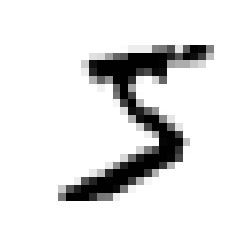

In [6]:
# para represetar la imagen re escalamos el vector y podemos hacer un plot con
# la funcion imshow() de Matplotlib 

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28) # re escalado a 28x28

plt.imshow(some_digit_image, cmap= mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

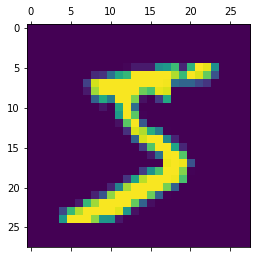

In [7]:
# Como es una matriz tambien podemos usar la funcion matshow para mostar
# un array como imagen
plt.matshow(some_digit_image)
plt.show()

In [8]:
# y para el target
y[0]

'5'

In [9]:
# y es un array de strings pero lo pasaremos a int con numpy
import numpy as np
y = y.astype(np.uint8)
y[0]

5

In [10]:
# especificamente este data-set viene con los datos divididos para train y test
# dividido en 60 mil y 10 mil 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Entrenando un Clasificador Binario
Un clasificador binario solo busca da dos respuestas (1 ó 0, si o no) y así para cada pregunta. Para este caso vamos a simplificar la respuesta a 5 o no 5 (-5)

In [11]:
y_train_5 = (y_train == 5) # es true para todos los 5, false para todo lo demas
y_test_5 = (y_test == 5)

In [12]:
# como se ve el array
y_train_5

array([ True, False, False, ...,  True, False, False])

In [13]:
# el gradiente desendee estocastico se puede usar en este caso porque
# su algoritmo tiene muy buen rendimiento en data-set muy grandes, como este
# de 700000 datos
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=41) # iniciacion al asar
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=41, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
# haciendo una prueba 
sgd_clf.predict([some_digit])

array([ True])

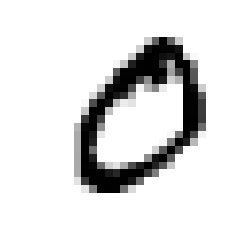

In [15]:
some_digit_next = X[1]
some_digit_image_next = some_digit_next.reshape(28,28) # re escalado a 28x28
plt.imshow(some_digit_image_next, cmap= mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [16]:
sgd_clf.predict([some_digit_next])

array([False])

# Medición de la eficiencia del modelo

## Cross Validation 

{Expricacion de cross validation}

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv = 3, scoring="accuracy")

array([0.9566 , 0.95355, 0.96165])

In [18]:
# un 92% de efectividad con una validacion crusada puede que se ve muy bien pero,
# vamos a ondar un poco mas en los datos que no son 5
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train, y_train, cv = 3, scoring = "accuracy")

array([0.0997 , 0.0965 , 0.09995])

Resulta que la cantidad de registros que no son 5 es del 90% y solo el 10% si son 5, por tanto se da un sesgo desde los tados hacia el resultado de la clasificación

## Matriz de confusión 

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53651,   928],
       [ 1636,  3785]])

In [22]:
# precision y recall scores.
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.8030978145554848

In [23]:
recall_score(y_train_5, y_train_pred)

0.6982106622394392

In [24]:
# score f1. es la conbinación de los dos anteriores scores
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.74699032958358

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([4620.35894938])

In [26]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [29]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

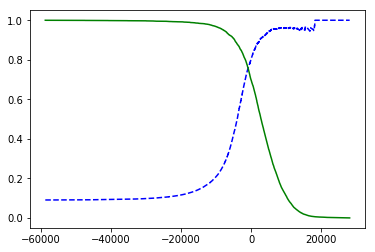

In [30]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [31]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [32]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [33]:
precision_score(y_train_5,y_train_pred_90)

0.9000314366551398

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.5281313410809814

## Curva ROC

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

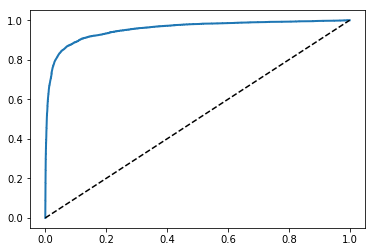

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9548657434867129

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

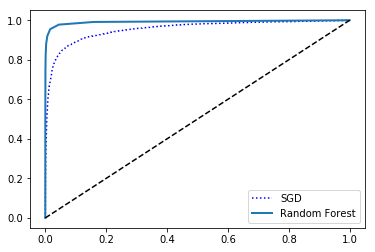

In [40]:
plt.plot(fpr,tpr,'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc="lower right")
plt.show()

In [41]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

### Multiclass classification (Clasificación con varias categorias)

In [42]:
sgd_clf.fit(X_train, y_train) #y_train y no y_train_5
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [43]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-25982.25980019, -28688.65032784,  -8051.95484476,
          -334.95554587, -22339.06220226,   2571.51827647,
        -21784.15587352, -14558.5494905 ,  -7714.68494231,
        -11263.95546334]])

In [44]:
np.argmax(some_digit_scores)

5

In [45]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [46]:
sgd_clf.classes_[5]

5

Sklearn da una herramienta para crear un clasificador uno vs uno  
ó uno vs todos, usando un clasificador binario.


In [47]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [48]:
# longitud de estimaciones 
len(ovo_clf.estimators_)

45

Es mucho mas simple entrenar un un RandomForest que si soporta  
multiples categorias a clasificar

In [49]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=uint8)

In [50]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [51]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.89087183, 0.87689384, 0.86337951])

In [52]:
# dado lo aprendido en anteriores capitulos podemos escalar 
# las variables numericas para ver si mejora el score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8975205 , 0.89049452, 0.90703606])

### Análisis de error en clasificadores de multiples clasificaciones

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5578,    0,   21,    7,    8,   41,   35,    6,  226,    1],
       [   0, 6402,   37,   23,    4,   44,    4,    7,  208,   13],
       [  26,   26, 5230,   91,   74,   27,   67,   37,  370,   10],
       [  22,   17,  115, 5245,    2,  203,   26,   39,  390,   72],
       [  12,   14,   42,   13, 5192,   11,   33,   25,  334,  166],
       [  27,   15,   29,  170,   53, 4457,   75,   15,  518,   62],
       [  30,   16,   44,    2,   43,   97, 5549,    5,  131,    1],
       [  20,   10,   52,   28,   50,   12,    3, 5704,  179,  207],
       [  18,   62,   46,   91,    3,  123,   24,   11, 5427,   46],
       [  23,   18,   30,   65,  118,   37,    1,  182,  358, 5117]])

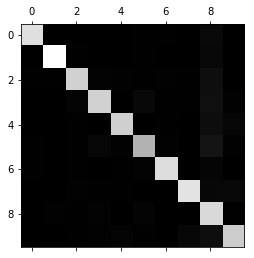

In [54]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Ahora que vemos como esta la matriz de correlacion podemos  
hacer un calculo para saber en donde suceden mas errores

In [55]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/ row_sums

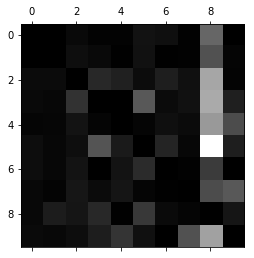

In [56]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

Ahora podemos ver que el 8 tiene muchas confuciones con  
el 5 el 3. Ahora podemos ver como son esos errores

In [57]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

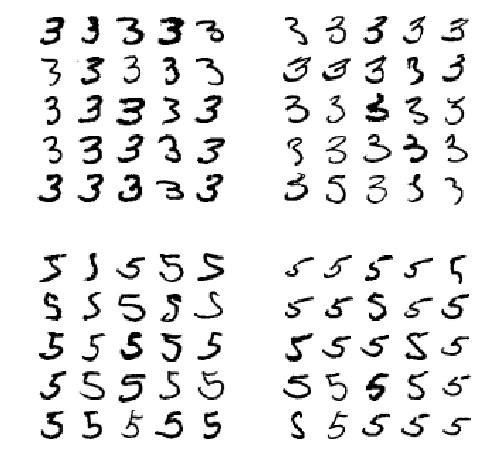

In [58]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Clasificación Multi Valor (Multilabel Classification)  

Existe otro tipo le clasificación que es la clasificación  
de multiples etiquetas o valores

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# categoria si el numero es mayor que 7
y_train_large = (y_train >= 7)

# categoria si el numero es impar
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [62]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3,n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

### Clasificaciones de multiple salida (Multioutput Classification)

In [63]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

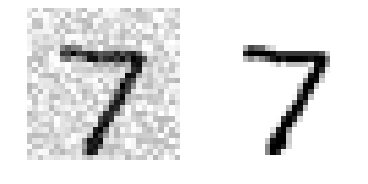

In [65]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

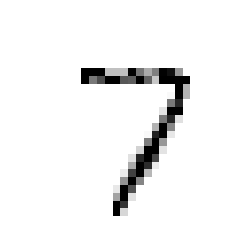

In [66]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)